## Matplotlib Stock prices visualization
- Using Alpha Avantage API to download stocks history (has some warning, but still works on rev0.6.0)
- Create graphs of closing prices and checking out trends using pandas rolling feature
- Drawing candlestick graphs
- Annotating text with prices and notes to the graphs
- Creating multiple Y graphs
- Customizing legends

Inspired by tutorials published at http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

# from pandas_datareader import data
import pandas as pd
import numpy as np

from datetime import datetime
import datetime as dt

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def get_stocks_history(stocks_code, start_date, end_date):
    STR_DATE_FORMAT = '%Y-%m-%d'
    # Using pandas_reader.data.DataReader (w/ google onlinedata source)
#     df = data.DataReader(stocks_code, 'google', start_date, end_date)
    # Now using Alpha Vantage API
    df = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+
                     stocks_code+"&apikey=NI5R3TEQ9R8ALJSK&datatype=csv&outputsize=full", 
                     sep=',', 
                     header=0,
                     index_col=0)
    df.index = pd.to_datetime(df.index, format=STR_DATE_FORMAT)
    
    start = datetime.strptime(start_date, STR_DATE_FORMAT)
    end = datetime.strptime(end_date, STR_DATE_FORMAT)
    df = df[(df.index > start) & (df.index < end)]
    return df

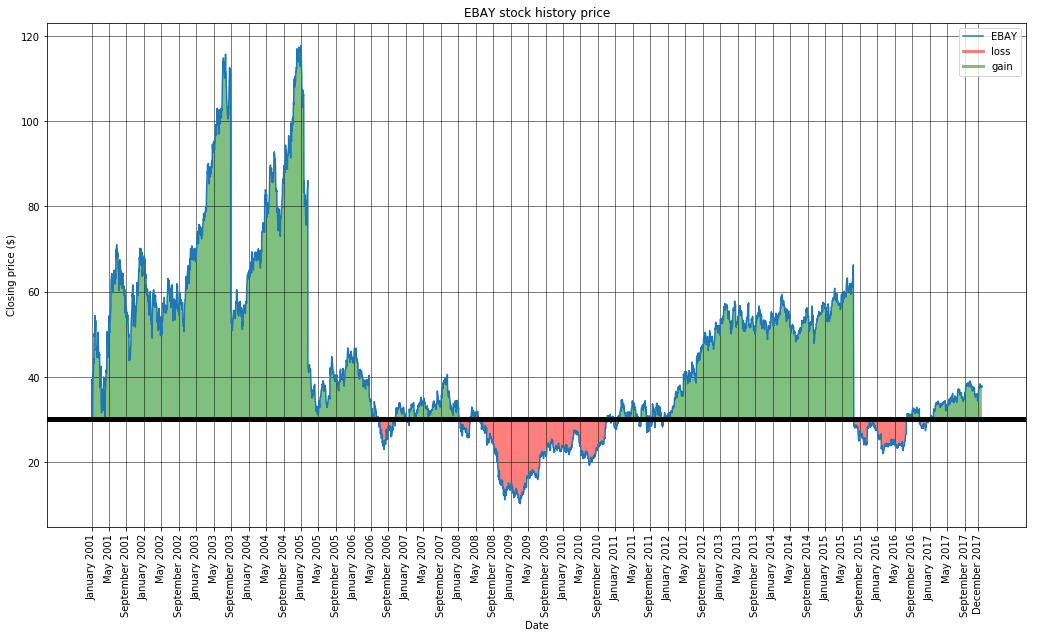

In [3]:
stocks_code='EBAY'
stocks = get_stocks_history(stocks_code, '2001-01-01', '2017-12-31')

dates = stocks.index
values = stocks['close'].values

# Clear matplotlib canvas
plt.clf()
# Create figure to set canvas size
fig = plt.figure(figsize=(16,10))

# crate axis variable to make changes
ax1 = plt.subplot2grid((1,1), (0,0))

#Plot main line
ax1.plot(dates, values, '-', label=stocks_code)

# We want to clearly know when the stock closed under the IPO price
# So fill the graph with gain (green) and loss (red) color if the 
# values is greater or lesser than the IPO value, respectively
# NOTE: The DataFrame has inverted order (first the latter days),
#       so using -1 index to indicate the Series beginning

ax1.fill_between(dates, values, values[-1],where=(values > values[-1]), facecolor='g', alpha=0.5)
ax1.fill_between(dates, values, values[-1],where=(values < values[-1]), facecolor='r', alpha=0.5)
ax1.axhline(values[-1], color='k', linewidth=5) # remember the DataFrame has inverted order

# Create new labels to simulate the gain/loss legend
ax1.plot([],[],linewidth=3, label='loss', color='r',alpha=0.5)
ax1.plot([],[],linewidth=3, label='gain', color='g',alpha=0.5)

# Rotating labels of x-axis
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Show grid lines
ax1.grid(True, color='k', alpha=0.5, linestyle='-', linewidth=1)

# Set X ticks to show 3 months of every year
fourmonth_dates= np.unique(dates.strftime('%Y/%m'))[::4]
fourmonth_dates = np.append(fourmonth_dates, dates[0].strftime('%Y/%m'))
dt_dates = [datetime.strptime(d, '%Y/%m') for d in fourmonth_dates]
str_dates = [d.strftime('%B %Y') for d in dt_dates]
ax1.set_xticks(dt_dates)
ax1.set_xticklabels(str_dates)

plt.title(stocks_code+' stock history price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

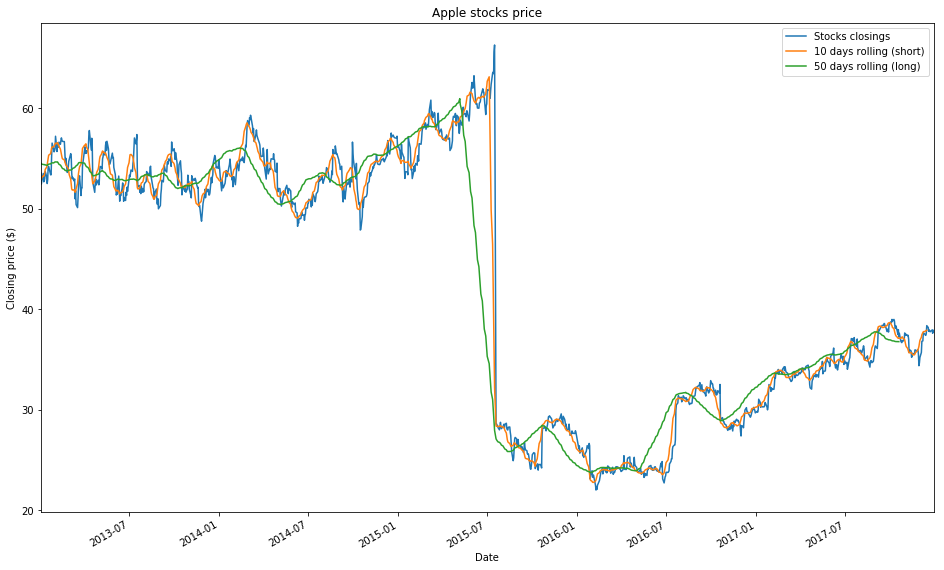

In [4]:
# Ploting Apple stock series
# In order to compared the behavior of this stock in a short and long term, we use pandas rolling 
# window feture to create a simple moving average of the original time-series. The rolling feature
# takes into account the last [n] prices to apply a fuction (e.g. mean, sum, std).

# Retrieving EBAY stocks history
stocks_code='EBAY'
stocks = get_stocks_history(stocks_code, '2013-01-01', '2017-12-31')

# Calculate the 20 and 100 days moving averages of the closing prices
stocks_rolling_20 =  stocks['close'].rolling(window=10).mean()
stocks_rolling_100 = stocks['close'].rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(16,10))

# Clear matplotlib canvas
plt.clf()
# plot graph of closing prices and rolling lines
stocks['close'].plot(label='Stocks closings')
stocks_rolling_20.plot(label='10 days rolling (short)')
stocks_rolling_100.plot(label='50 days rolling (long)')
plt.title('Apple stocks price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()

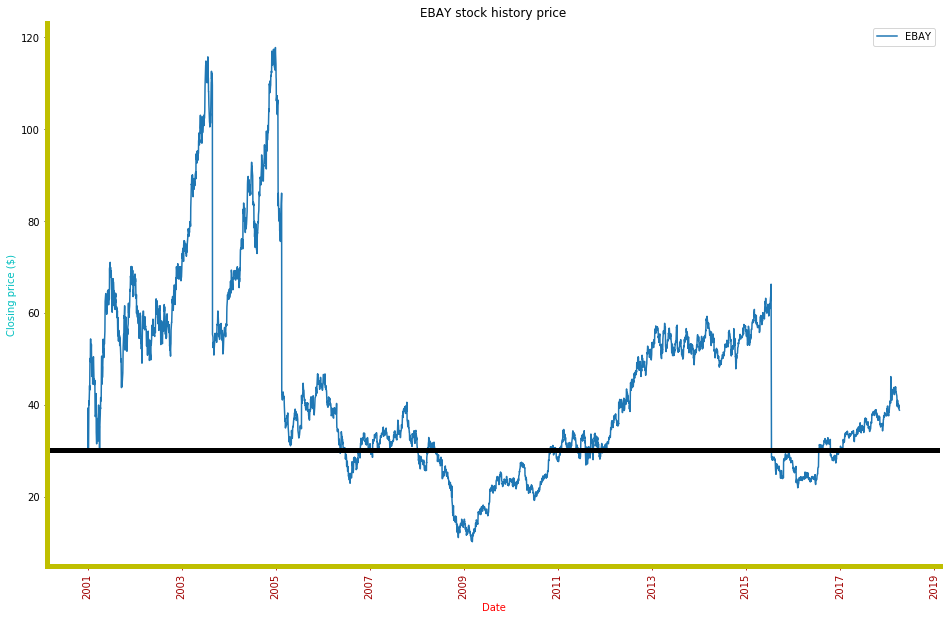

In [5]:
# Applying some color customization to the graph

stocks_code='EBAY'
stocks = get_stocks_history(stocks_code, '2001-01-01', '2018-12-31')

dates = stocks.index
values = stocks['close'].values


# Clear matplotlib canvas
plt.clf()
# Create figure to set canvas size
fig = plt.figure(figsize=(16,10))

# crate axis variable to make changes
ax1 = plt.subplot2grid((1,1), (0,0))

#Plot main line
ax1.plot(dates, values, label=stocks_code)

# Rotating labels of x-axis
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Changing spines configurations
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('y')
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_color('y')
ax1.spines['bottom'].set_linewidth(5)
ax1.tick_params(axis='x', colors='#A00000')
# drawing a line to mark the price Series started
ax1.axhline(values[-1], color='k', linewidth=5) # remember the DataFrame has inverted order

# Set label colors
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('c')

plt.title(stocks_code+' stock history price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


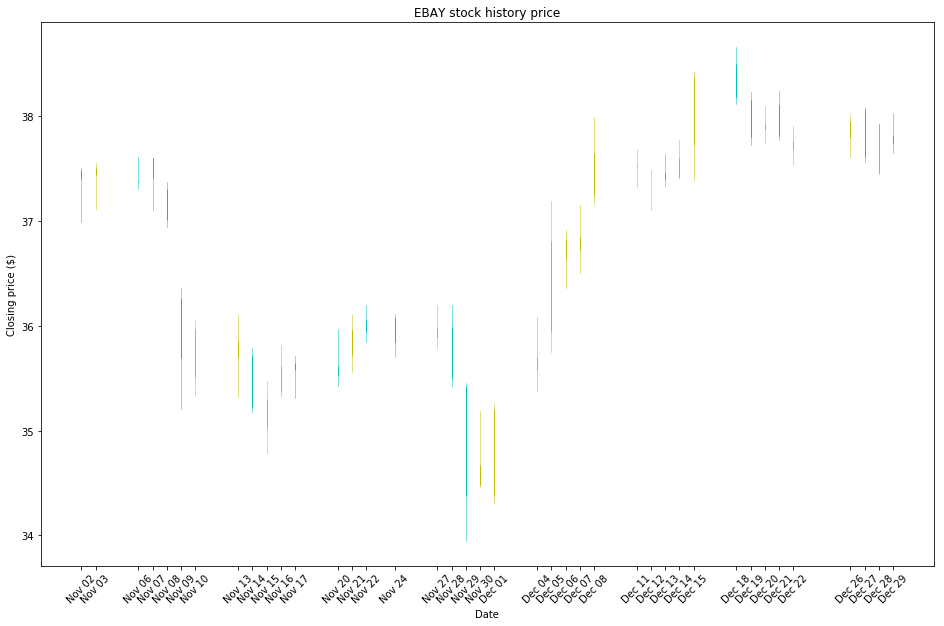

In [6]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

stocks_code='EBAY'
stocks = get_stocks_history(stocks_code, '2017-11-01', '2017-12-31')

quotes = []
for idx, row in stocks.iterrows():
    quotes.append([idx.timestamp(), row.open, row.high, row.low, row.close])

# Clear matplotlib canvas
plt.clf()
# Create figure to set canvas size
fig = plt.figure(figsize=(16,10))

# crate axis variable to make changes
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, quotes, width=0.6, colorup='y', colordown='c')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

ax1.set_xticks([s.timestamp() for s in stocks.index])
ax1.set_xticklabels(stocks.index.strftime('%b %d'))

plt.title(stocks_code+' stock history price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


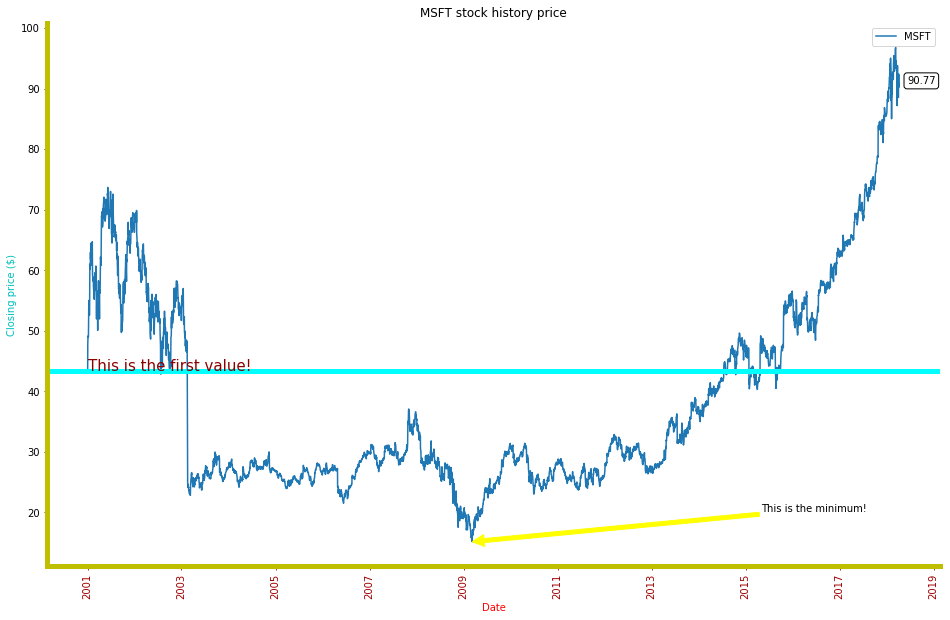

In [7]:
stocks_code='MSFT'
stocks = get_stocks_history(stocks_code, '2001-01-01', '2018-12-31')

dates = stocks.index
values = stocks['close'].values

# Clear matplotlib canvas
plt.clf()
# Create figure to set canvas size
fig = plt.figure(figsize=(16,10))

# crate axis variable to make changes
ax1 = plt.subplot2grid((1,1), (0,0))

#Plot main line
ax1.plot(dates, values, label=stocks_code)

# Rotating labels of x-axis
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Changing spines configurations
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_color('y')
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_color('y')
ax1.spines['bottom'].set_linewidth(5)
ax1.tick_params(axis='x', colors='#A00000')

# drawing a line to mark the price Series started
ax1.axhline(values[-1], color='cyan', linewidth=5) # remember the DataFrame has inverted order

# text and annotations
font_dict = {'family':'sans-serif',
             'color':'darkred',
             'size':15}
ax1.text(dates[-1], values[-1],'This is the first value!', fontdict=font_dict)
min_index = np.argmin(values, axis=0)
ax1.annotate('This is the minimum!',(dates[min_index],values[min_index]),
             xytext=(0.8, 0.1), textcoords='axes fraction',
             arrowprops = dict(facecolor='blue',color='yellow'))
bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
ax1.annotate(str(values[0]), (dates[0], values[0]),
             xytext = (dates[0] + dt.timedelta(days=60), values[0]), bbox=bbox_props)

# Set label colors
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('c')

plt.title(stocks_code+' stock history price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


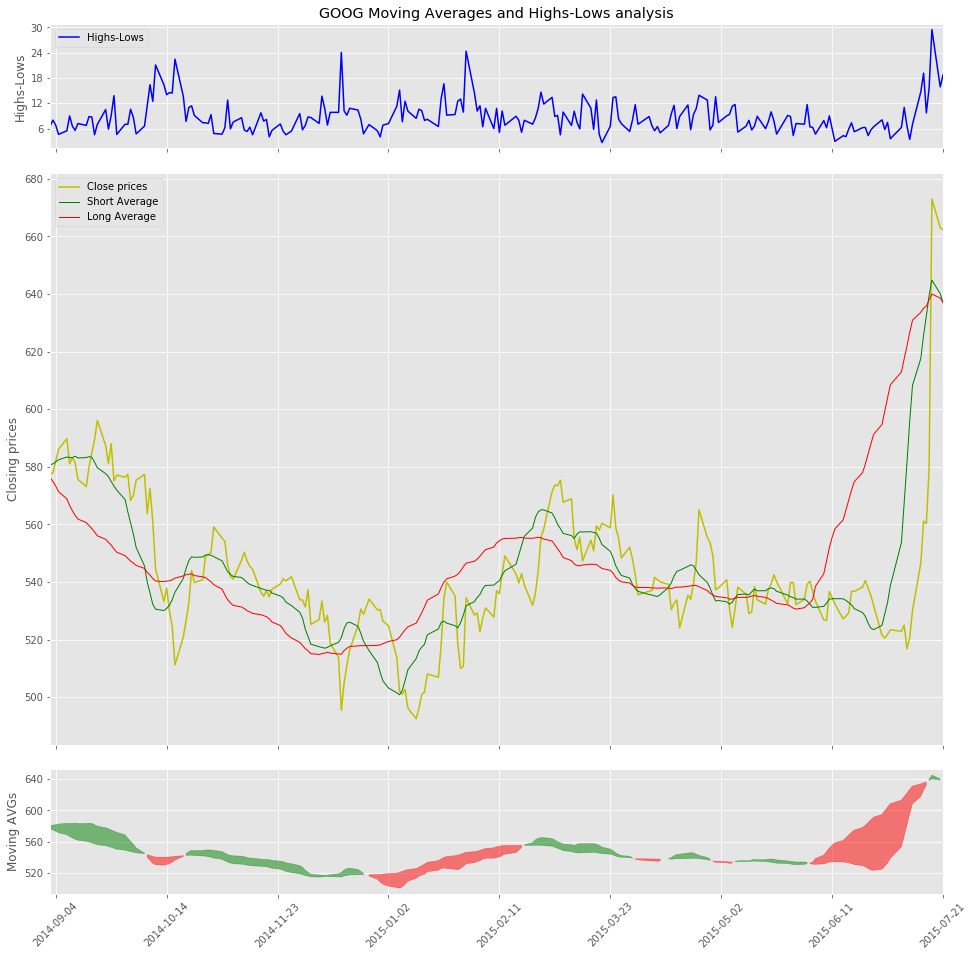

In [8]:
# Creating plots with moving averages (from scratch) and highs minuts lows prices


# Moving averages function
def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

# Spread calc function
def high_minus_low(highs, lows):
    return highs-lows


stocks_code='GOOG'
stocks = get_stocks_history(stocks_code, '2014-09-01', '2015-09-01')

dates = stocks.index
closep = stocks['close'].values
highp  = stocks['high'].values
lowp   = stocks['low'].values
MOVING_AVERAGE1 = 10  # week
MOVING_AVERAGE2 = 30 # month

short_averages = moving_average(closep, MOVING_AVERAGE1)
long_averages = moving_average(closep, MOVING_AVERAGE2)
start_date = len(dates[MOVING_AVERAGE2 - 1:])

highs_lows = list(map(high_minus_low, highp, lowp)) # Creating a new list with a function !!!

# Clear matplotlib canvas and apply style
plt.clf()
style.use('ggplot')

# Create figure to set canvas size
fig = plt.figure(figsize=(16,16))

# Create axes

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
plt.title(stocks_code+' Moving Averages and Highs-Lows analysis')
plt.ylabel('Highs-Lows')
ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
plt.ylabel('Closing prices')
ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
plt.ylabel('Moving AVGs')

# Plot spreads
ax1.plot_date(dates[-start_date:], highs_lows[-start_date:],'-', label='Highs-Lows', color='b')
# Setting the amount of markers to 10
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower')) 

# Plot close prices
ax2.plot(dates[-start_date:], closep[-start_date:], label='Close prices', color='y')
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=10, prune='lower')) 

# Plot moving average proces
ax2.plot(dates[-start_date:], short_averages[-start_date:], label='Short Average', linewidth=1, color='g')
ax2.plot(dates[-start_date:], long_averages[-start_date:], label='Long Average', linewidth=1, color='r')
ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower')) 

# When the short average passes up the long average it is a sign of buying (?): green
# When the short average gioes down it is a sign of selling (?): red
ax3.fill_between(dates[-start_date:], long_averages[-start_date:], short_averages[-start_date:],
                 where=(short_averages[-start_date:] < long_averages[-start_date:]),
                 facecolor='r', edgecolor='r', alpha=0.5)
ax3.fill_between(dates[-start_date:], long_averages[-start_date:], short_averages[-start_date:],
                 where=(short_averages[-start_date:] > long_averages[-start_date:]),
                 facecolor='g', edgecolor='g', alpha=0.5)

# hiding ax1-x and ax1-x labels
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
    
# rotating and formatting ax3-x labels
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))

# Show legend
ax1.legend()
ax2.legend()
ax3.legend()

plt.margins(x=0)
plt.show()

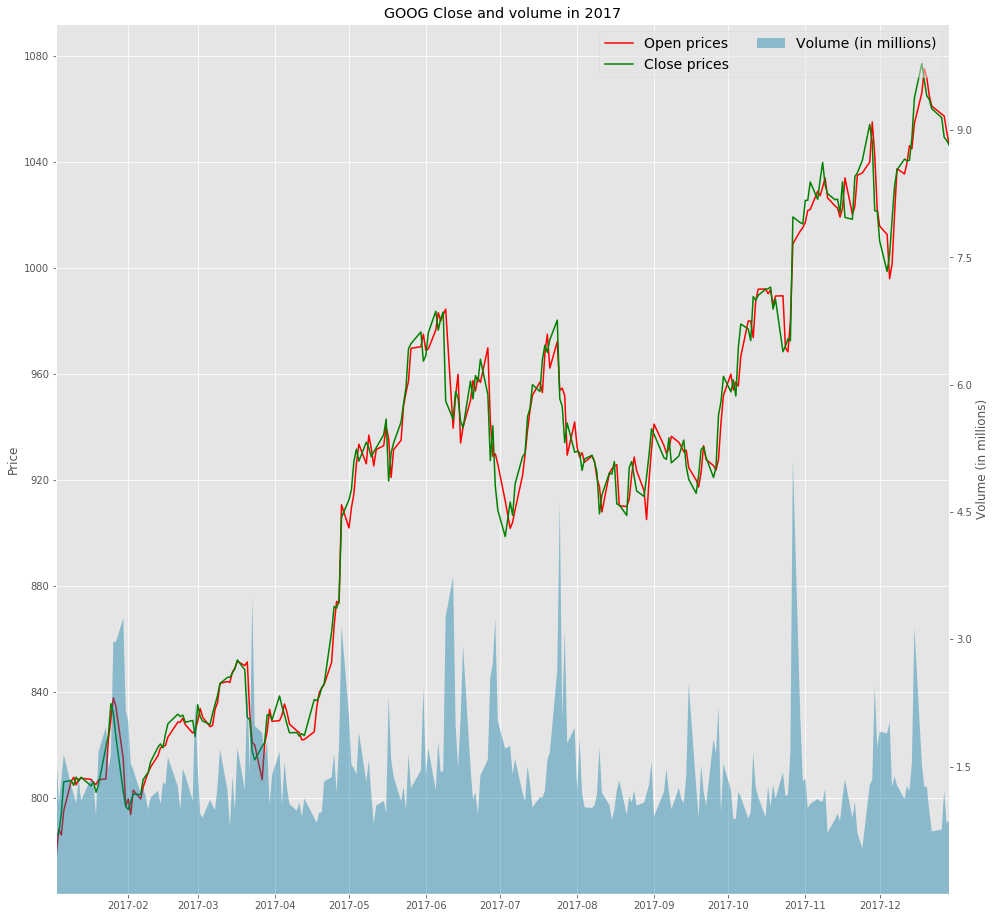

In [9]:
# Creating multiple Y graphs (a graph with two different scales in Y, but the same X)
# Plotting the close price and the volume in the same graph

stocks_code='GOOG'
stocks = get_stocks_history(stocks_code, '2017-01-01', '2017-12-31')

dates = stocks.index
openp = stocks['open'].values
closep = stocks['close'].values
volume  = stocks['volume'].values/1000000

# Clear matplotlib canvas and apply style
plt.clf()
style.use('ggplot')

# Create figure to set canvas size
fig = plt.figure(figsize=(16,16))

# Create axes
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
plt.title(stocks_code+' Close and volume in 2017')
plt.ylabel('Price')
ax2 = ax1.twinx()
plt.ylabel('Volume (in millions)')
ax2.grid(False)

# Plot close prices
ax1.plot(dates, openp, label='Open prices', color='r')
ax1.plot(dates, closep, label='Close prices', color='g')
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=10, prune='lower')) 
# Plot volume
ax2.fill_between(dates,0, volume, facecolor='#0079a3', label='Volume (in millions)', alpha=0.4)
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=10, prune='lower')) 
from matplotlib.ticker import ScalarFormatter
ax2.yaxis.get_major_formatter().set_scientific(False) # avoind exponential values in this axis
ax2.set_ylim(0, 2*volume.max())

# Show all legends together
# Customizing legends :)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# NOTE: ncol param == 1 means the legend frame will have two columns 
legend = ax2.legend(lines + lines2, labels + labels2, loc='upper right', ncol=2, prop={'size':14}) 
legend.get_frame().set_alpha(0.5)

plt.margins(x=0)
plt.show()